In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\ian chong\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
host='localhost'
user='root' # replace with your own user
passwd='(Hl2freak)' # replace with your own password
database='classicmodels'

mydb = mysql.connector.connect(
    host=host,
    user=user,
    passwd=passwd,
    database=database
)

print(mydb)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

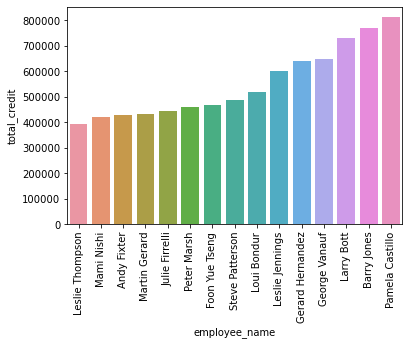

In [3]:
query = '''SELECT CONCAT(employees.firstName," ",employees.lastName) AS employee_name, customers.salesRepEmployeeNumber, SUM(customers.creditLimit) AS total_credit
FROM customers
LEFT JOIN employees 
ON employees.employeeNumber = customers.salesRepEmployeeNumber
GROUP BY salesRepEmployeeNumber;'''

credit_by_salesRep = pd.read_sql(query, con=mydb)
credit_by_salesRep.set_index('salesRepEmployeeNumber',inplace=True)
sns.barplot(data=credit_by_salesRep.sort_values(by='total_credit'),x='employee_name',y='total_credit')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

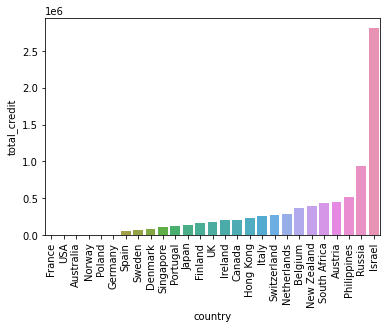

In [4]:
query = '''SELECT customers.country, SUM(customers.creditLimit) AS total_credit
FROM customers
GROUP BY customers.country;'''

credit_by_country = pd.read_sql(query, con=mydb)
credit_by_country.set_index('country',inplace=True)
sns.barplot(data=credit_by_country.sort_values(by='total_credit'),x=credit_by_country.index,y='total_credit')
plt.xticks(rotation=90)